In [1]:
# Install necessary libraries (Pillow for images, NumPy for array math)
!pip install Pillow numpy matplotlib

# Import libraries with common aliases
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os # For file system operations (optional but good practice)

print("Setup complete. Libraries are ready!")

Setup complete. Libraries are ready!


--2025-10-25 18:10:40--  https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_March_2010-1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2672116 (2.5M) [image/jpeg]
Saving to: ‘original_image.jpg’

original_image.jpg  100%[===================>]   2.55M  15.8MB/s    in 0.2s    

2025-10-25 18:10:40 (15.8 MB/s) - ‘original_image.jpg’ saved [2672116/2672116]

Original image loaded with size: (128, 128)
NumPy array shape: (128, 128, 3)


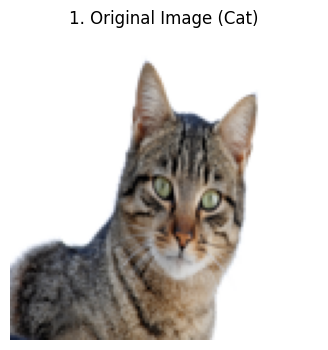

In [2]:


# 1. Download a sample image for demonstration
# Using a different, known-working link
!wget -O original_image.jpg "https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_March_2010-1.jpg"

image_path = 'original_image.jpg'

# 2. Load and Resize the image using PIL (Pillow)
original_img = Image.open(image_path).convert("RGB")
# Resize for faster processing and a uniform example size
original_img = original_img.resize((128, 128))
print(f"Original image loaded with size: {original_img.size}")

# 3. Convert to NumPy array and Normalize
# Normalize scales pixel values from 0-255 to the range 0.0-1.0
original_data = np.asarray(original_img, dtype=np.float32) / 255.0
print(f"NumPy array shape: {original_data.shape}")

# 4. Display the original image using Matplotlib
plt.figure(figsize=(4, 4))
plt.imshow(original_data)
plt.title("1. Original Image (Cat)")
plt.axis('off')
plt.show()

Perturbation array shape: (128, 128, 3)
Perturbation strength (epsilon): 0.1


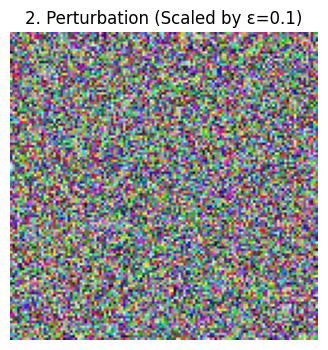

In [3]:


# 1. Define the Perturbation Strength (Epsilon)
# Epsilon (ε) controls the visual strength of the noise.
# Keep it small (e.g., 0.1) so the final image looks almost identical to the human eye.
epsilon = 0.1

# 2. Generate a random noise array
# Create a random array with the exact same shape as the image data
# Values will be between -1 and 1
random_noise = np.random.uniform(-1, 1, size=original_data.shape)

# 3. Scale the noise to create the perturbation
perturbation = epsilon * random_noise

print(f"Perturbation array shape: {perturbation.shape}")
print(f"Perturbation strength (epsilon): {epsilon}")


# 4. Display the perturbation (scaled up for visual check)
plt.figure(figsize=(4, 4))
# We scale and offset the perturbation just for display purposes
# so you can clearly see the static/noise pattern.
plt.imshow(perturbation * 5 + 0.5)
plt.title(f"2. Perturbation (Scaled by ε={epsilon})")
plt.axis('off')
plt.show()


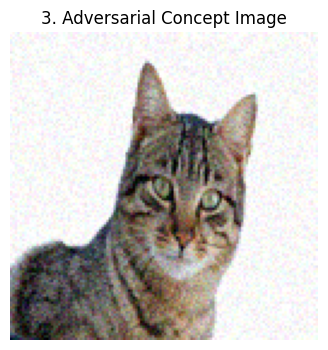

In [4]:


# 1. The Core Operation: Addition
# Adversarial Image = Original Data + Perturbation
# The 'original_data' and 'perturbation' variables are already defined from previous steps.
adversarial_data = original_data + perturbation

# 2. Clip the values to maintain a valid image range
# Pixel values must be between 0.0 and 1.0. This step ensures valid colors.
adversarial_data = np.clip(adversarial_data, 0.0, 1.0)

# 3. Display the final "adversarial" image
plt.figure(figsize=(4, 4))
plt.imshow(adversarial_data)
plt.title("3. Adversarial Concept Image")
plt.axis('off')
plt.show()

In [5]:


# 1. Convert the normalized data (0.0-1.0) back to 0-255 integer scale
# This is necessary to save it as a standard image file.
adversarial_img_int = (adversarial_data * 255).astype(np.uint8)

# 2. Convert the NumPy array back to a PIL Image object
adversarial_img = Image.fromarray(adversarial_img_int)

# 3. Define the output filename and save the image
output_filename = "adversarial_concept_output.png"
adversarial_img.save(output_filename)

print(f"Adversarial concept image successfully saved as: {output_filename}")

Adversarial concept image successfully saved as: adversarial_concept_output.png
